# Avocado Project

## Problem Statement:
    Avocado is a fruit consumed by people heavily in the United States. 

### Content
  This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

  The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data         comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

  Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an       aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in       the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

  The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are     not included in this table.

  Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
  4046 - Total number of avocados with PLU 4046 sold
  4225 - Total number of avocados with PLU 4225 sold
  4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [187]:
df = pd.read_csv(r'C:\Users\tusha\Downloads\project12\avocado\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [188]:
df.shape

(18249, 14)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [190]:
# To check the data type of each columns of the dataset.
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [191]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [192]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [193]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [194]:
#there is  column Unnamed: 0 in the dataset that we can drop as it does not helps so we drop
df.drop(columns=["Unnamed: 0"],inplace=True)

In [195]:
# changing pdate to datetime format
df['Date']=pd.to_datetime(df['Date'])
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [196]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [197]:
df.drop("Date",axis=1,inplace=True)

In [198]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [199]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

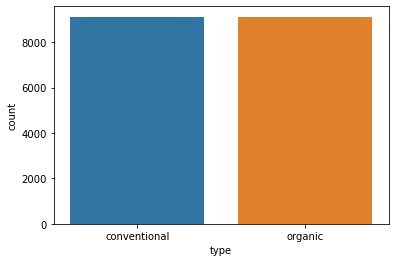

In [200]:
#Check sales of feature "type" 
sns.countplot(x="type",data=df)

### checking the missing values

In [201]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [202]:
# Here we can see that there is no missing values.

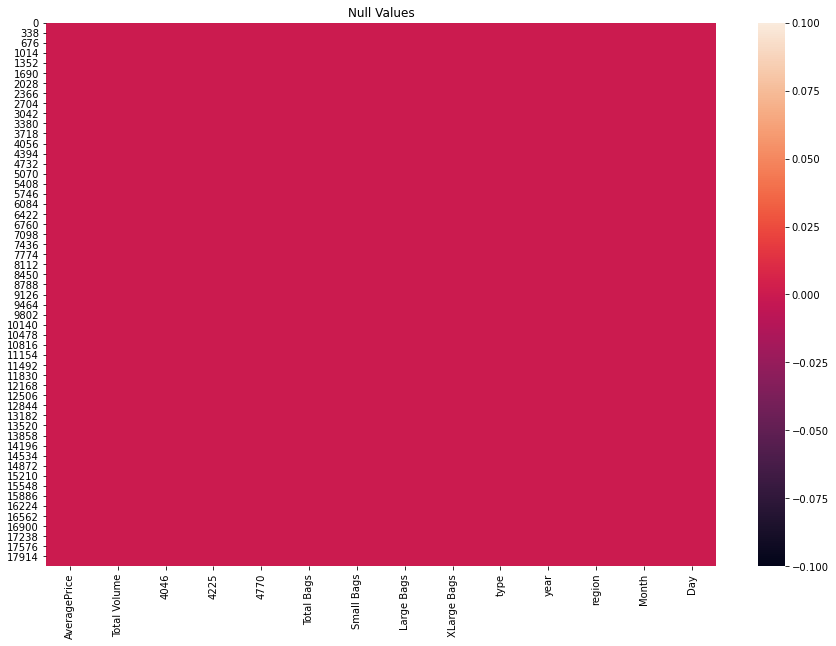

In [203]:
# checking the missing values by using the heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [204]:
# The above heatmap shows that there is no missing values.

# EXPLORATORY DATA ANALYSIS(EDA)
## Univariate Analysis

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

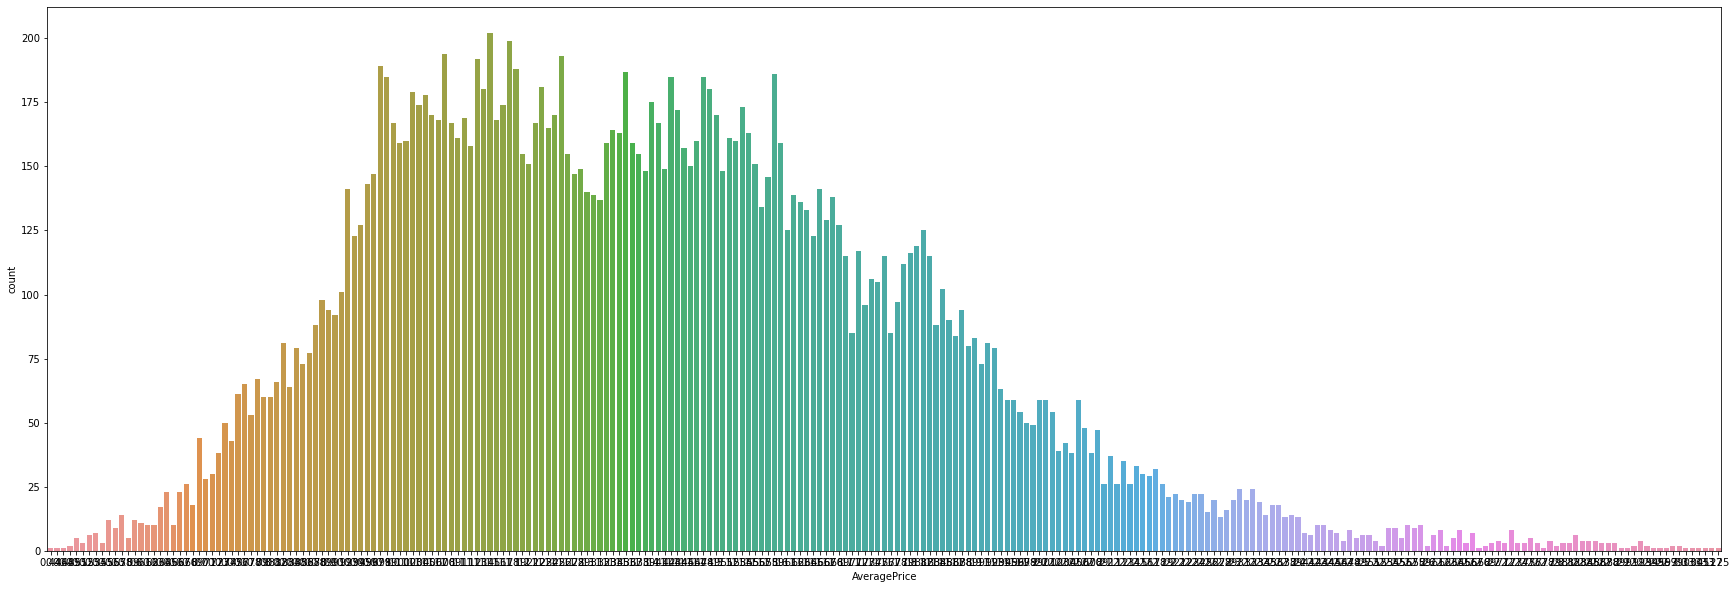

In [205]:
plt.figure(figsize=(30,10))
sns.countplot(x=df.AveragePrice)

<AxesSubplot:xlabel='count', ylabel='region'>

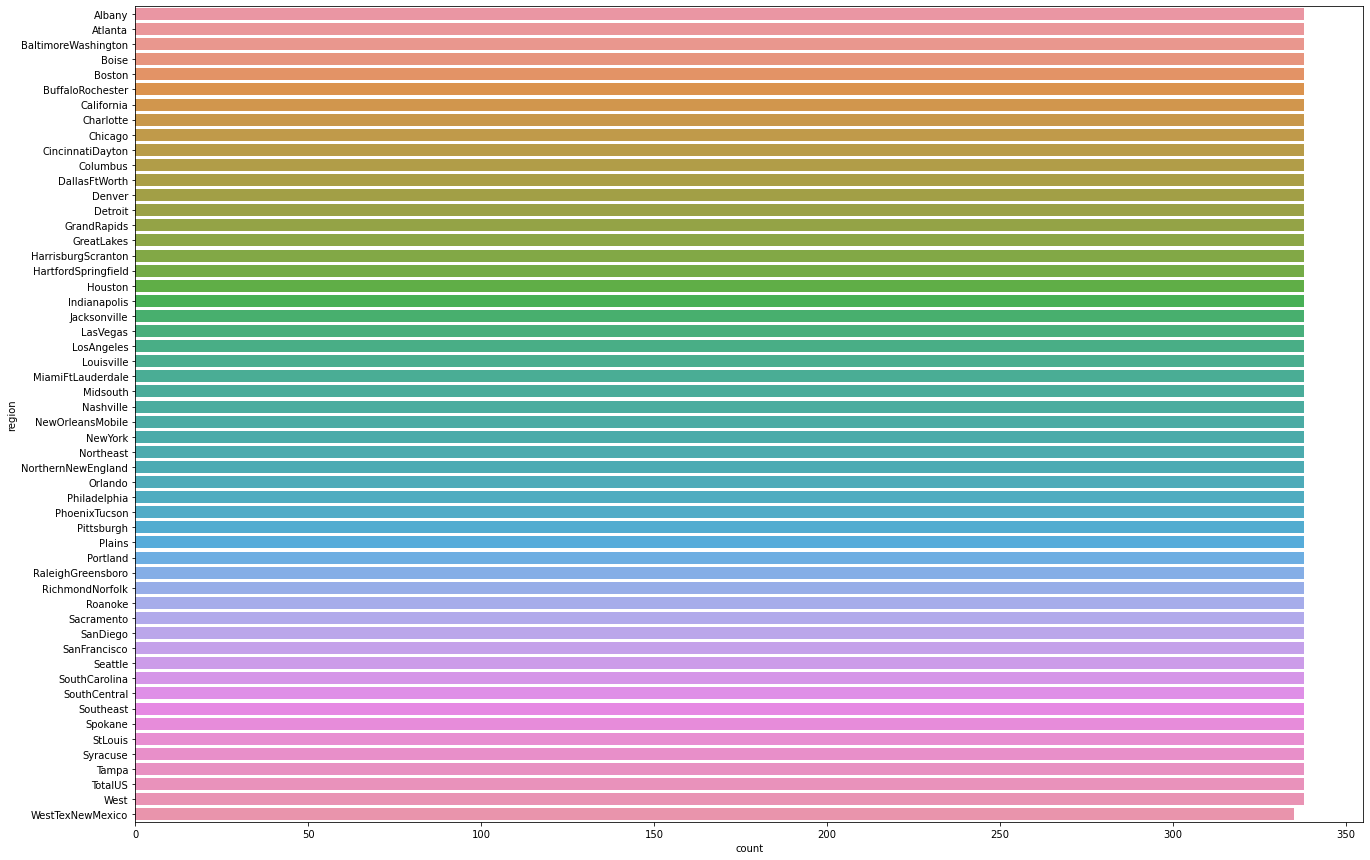

In [206]:
plt.figure(figsize=(22,15))
sns.countplot(y="region",data=df)

## Bivariate Analysis

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

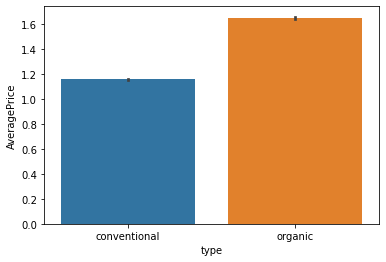

In [207]:
#Bi variate analysis
#Check "Avg price" vs "type of Avocados"
sns.barplot(x="type",y="AveragePrice",data=df)

##### Organic Avocados are more expensive than Conventional

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

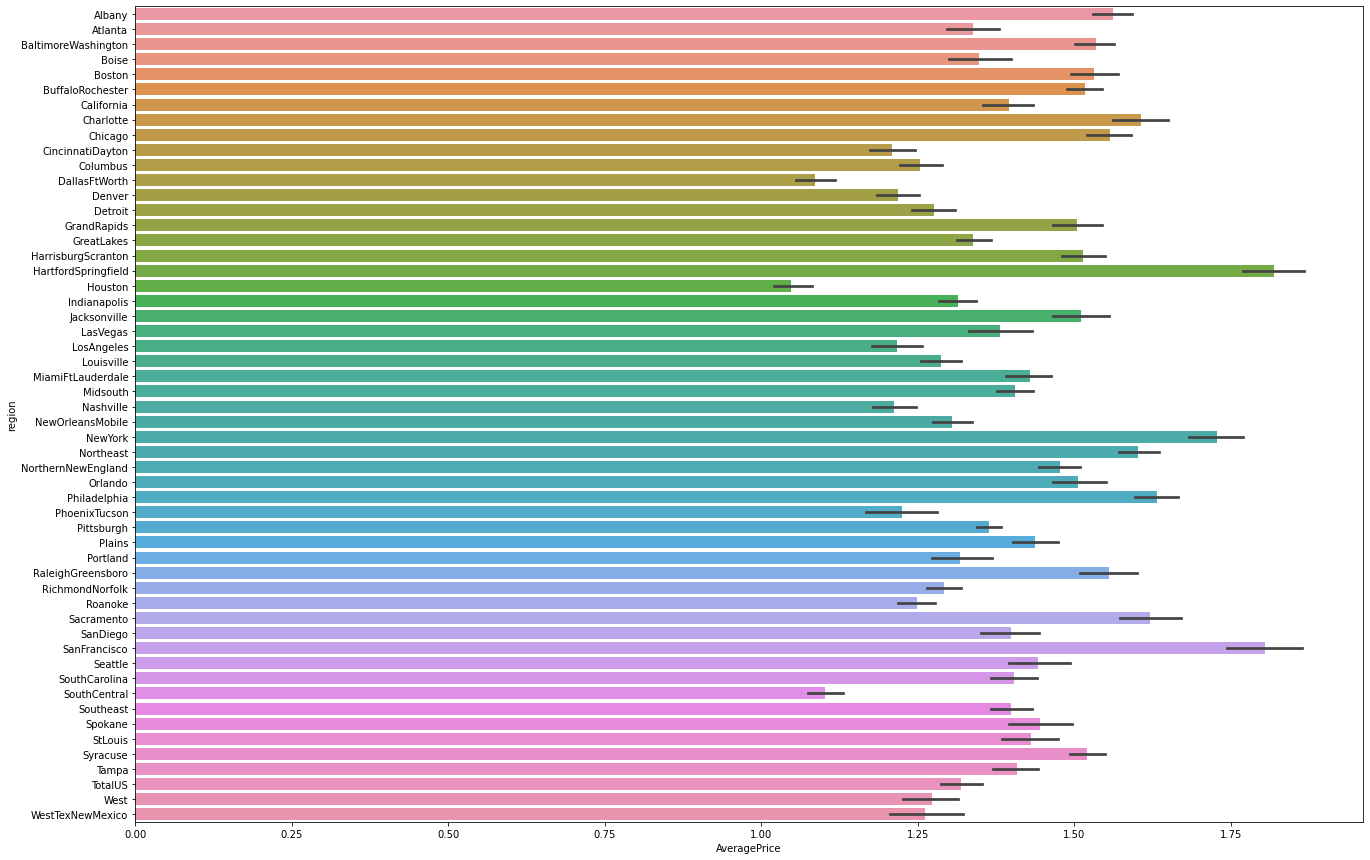

In [208]:
#Check "Avg price" vs "type of Avocados"
plt.figure(figsize=(22,15))
sns.barplot(y="region",x="AveragePrice",orient='h',data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

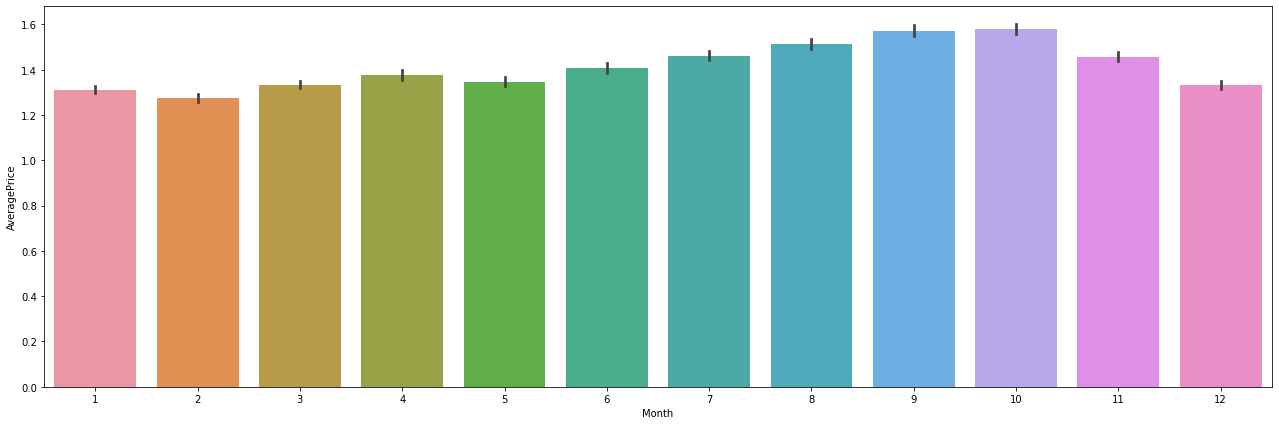

In [209]:
#Check Average price distribution
plt.figure(figsize=(22,7))
sns.barplot(x="Month",y="AveragePrice",data=df)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

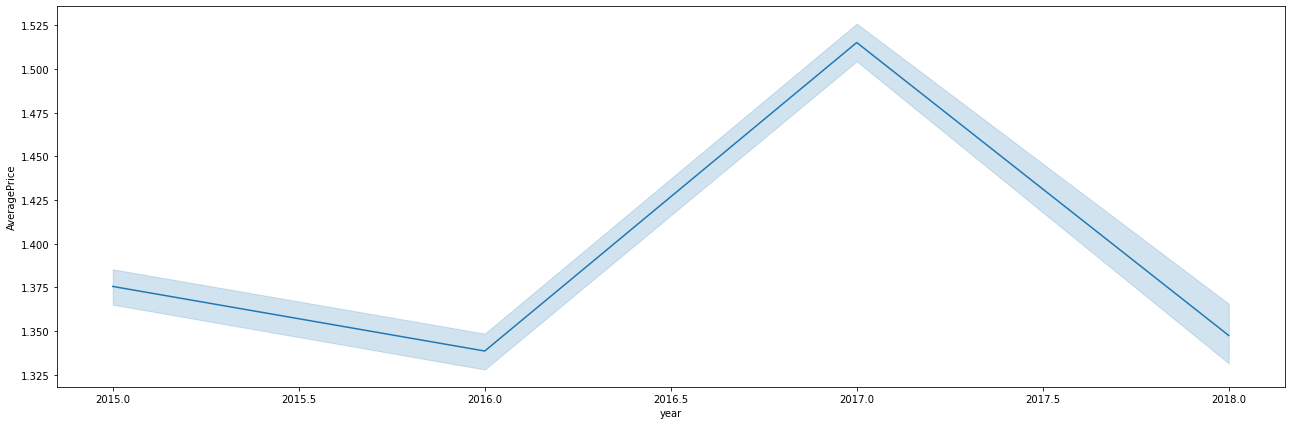

In [210]:
plt.figure(figsize=(22,7))
sns.lineplot(x="year",y="AveragePrice",data=df)

<AxesSubplot:xlabel='Day', ylabel='count'>

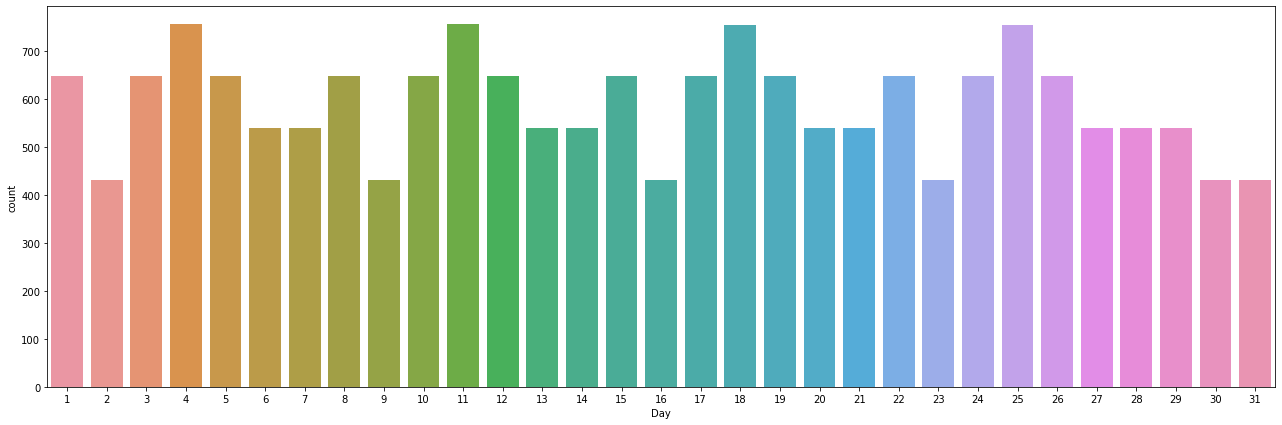

In [211]:
plt.figure(figsize=(22,7))
sns.countplot(x=df.Day)

<AxesSubplot:xlabel='Total Bags', ylabel='region'>

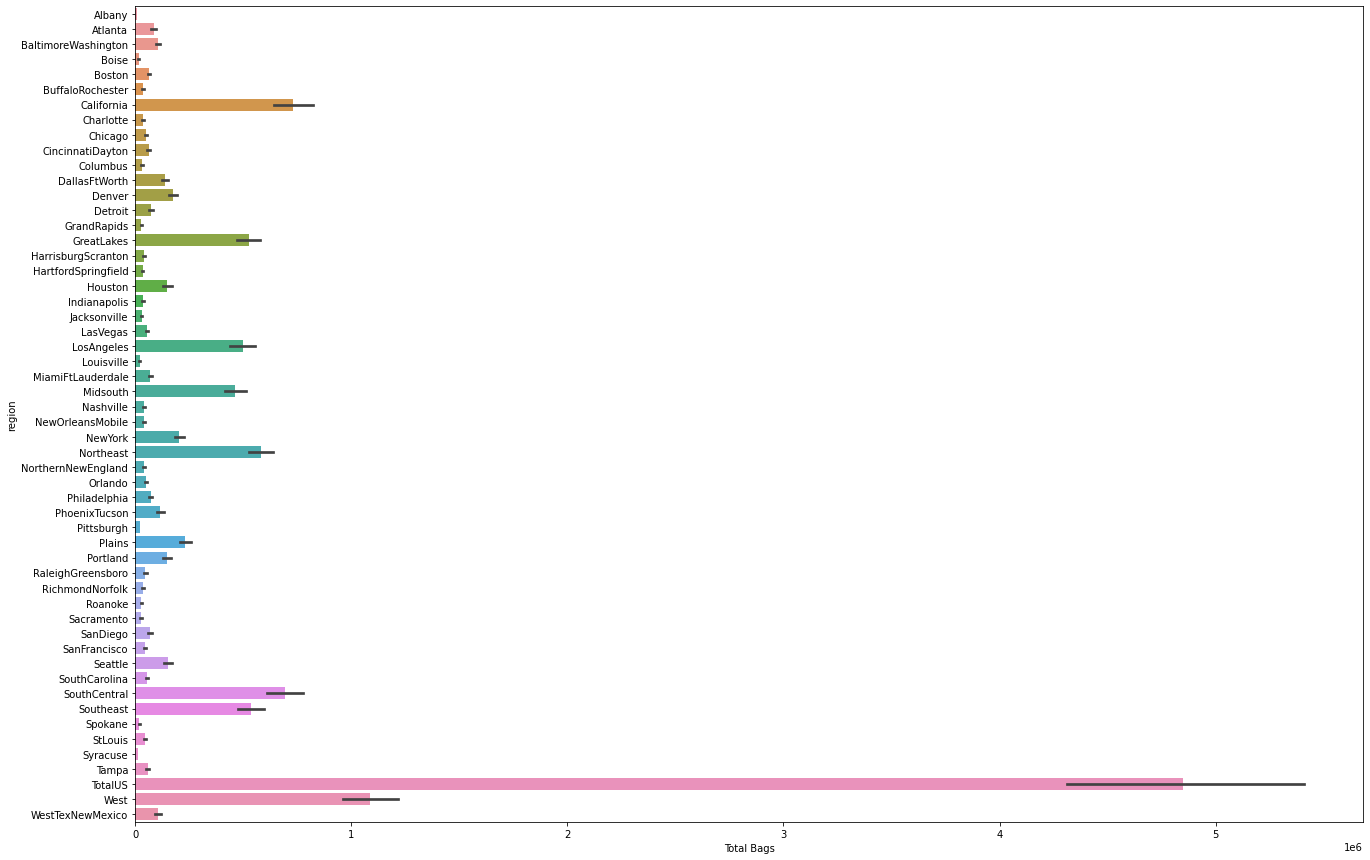

In [212]:
plt.figure(figsize=(22,15))
sns.barplot(y="region",x="Total Bags",data=df)

<AxesSubplot:title={'center':'Volumne VS Average Price'}, xlabel='AveragePrice', ylabel='Total Volume'>

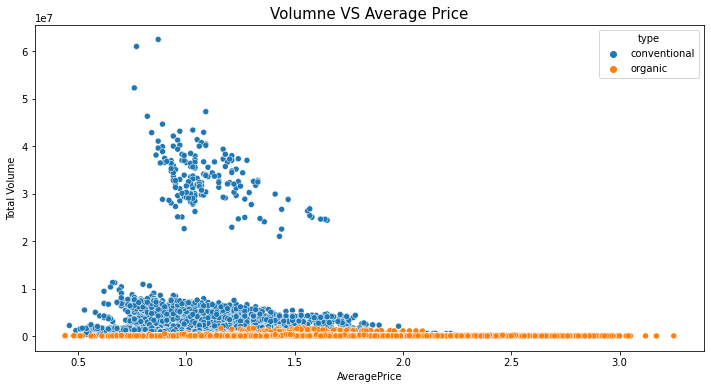

In [213]:
plt.figure(figsize=(12,6))
plt.title('Volumne VS Average Price',fontsize=15)
sns.scatterplot(df['AveragePrice'],df['Total Volume'],hue='type',data=df)

<AxesSubplot:title={'center':'Avacado 4046 VS Average Price'}, xlabel='AveragePrice', ylabel='4046'>

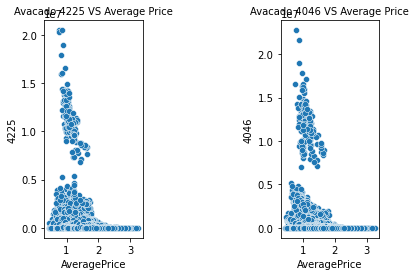

In [214]:
plt.subplot(1,3,1)
plt.title('Avacado 4225 VS Average Price',fontsize=10)
sns.scatterplot(df['AveragePrice'],df['4225'],data=df)

plt.subplot(1,3,3)
plt.title('Avacado 4046 VS Average Price',fontsize=10)
sns.scatterplot(df['AveragePrice'],df['4046'],data=df)

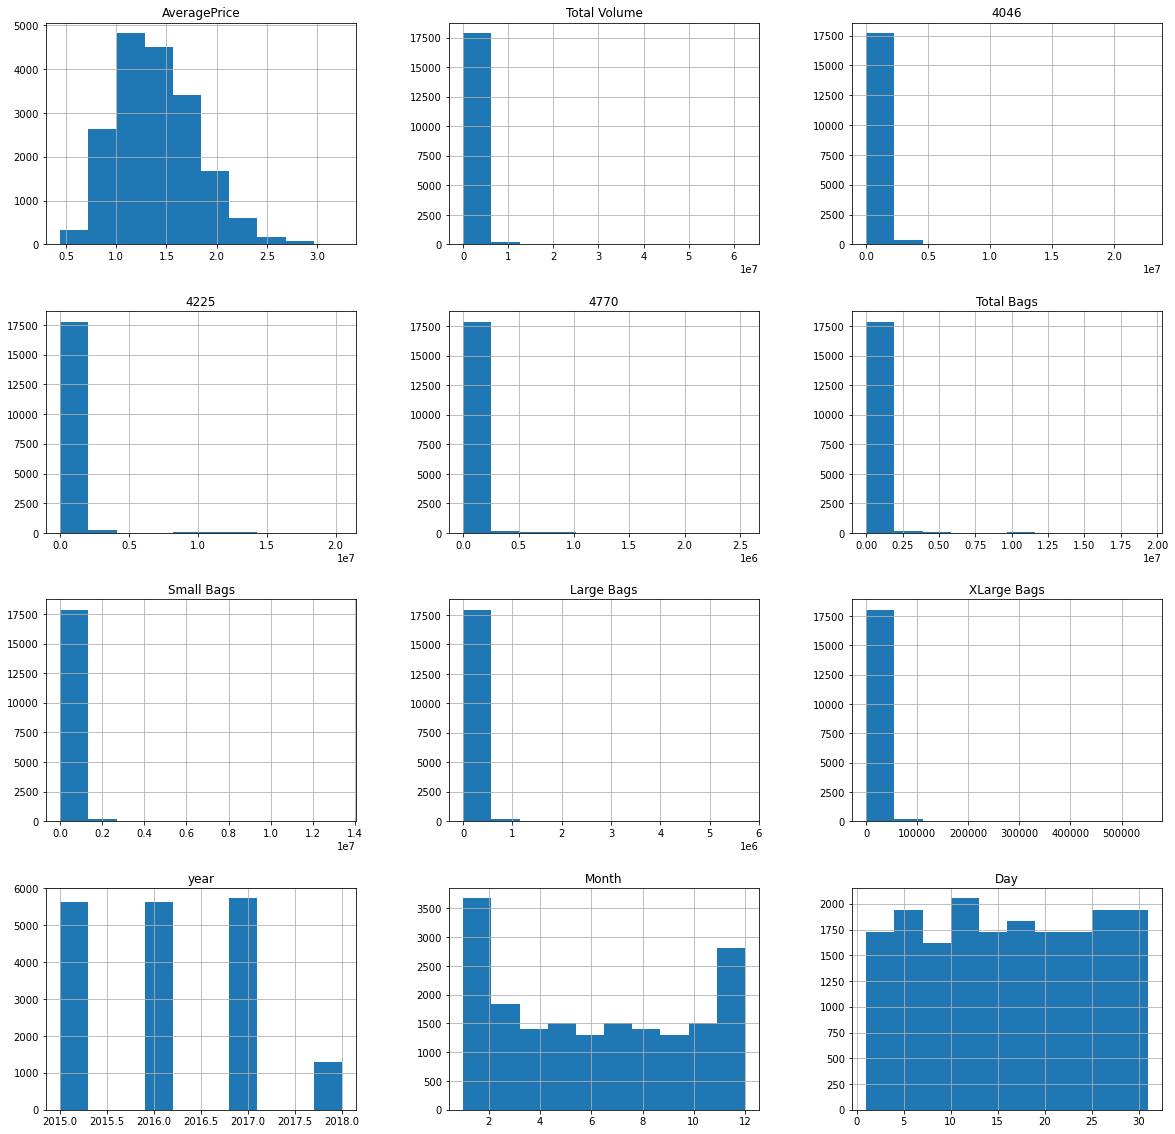

In [215]:
df.drop(['year','Month'],axis=1)
df.hist(figsize = (20,20))
plt.show()

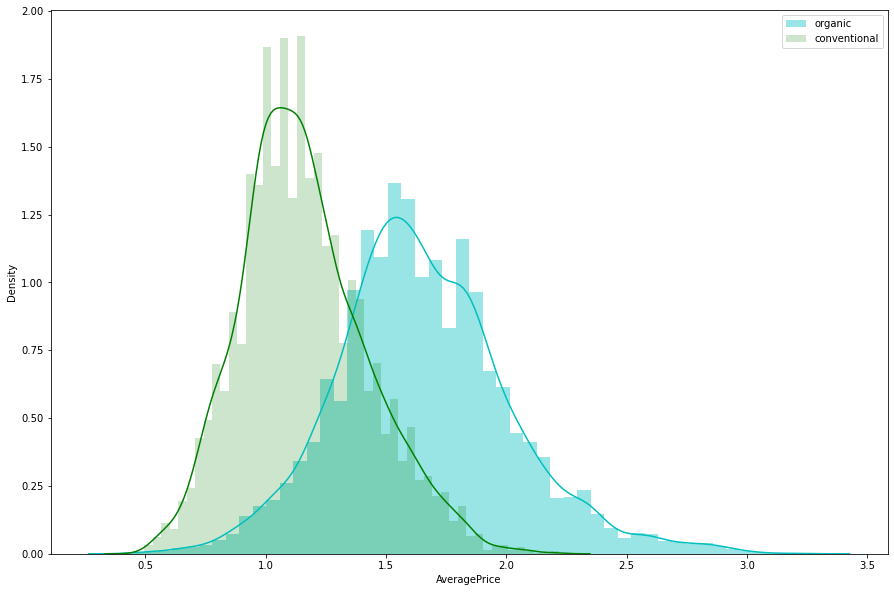

In [216]:
plt.figure(figsize=(15,10))
sns.distplot(df[df["type"] == "organic"]["AveragePrice"], color="c", label="organic")
sns.distplot(df[df["type"] == "conventional"]["AveragePrice"], color="g", label="conventional", 
             hist_kws={"alpha": 0.2})
plt.legend()

## Multi-Variate Analysis

In [217]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


<AxesSubplot:>

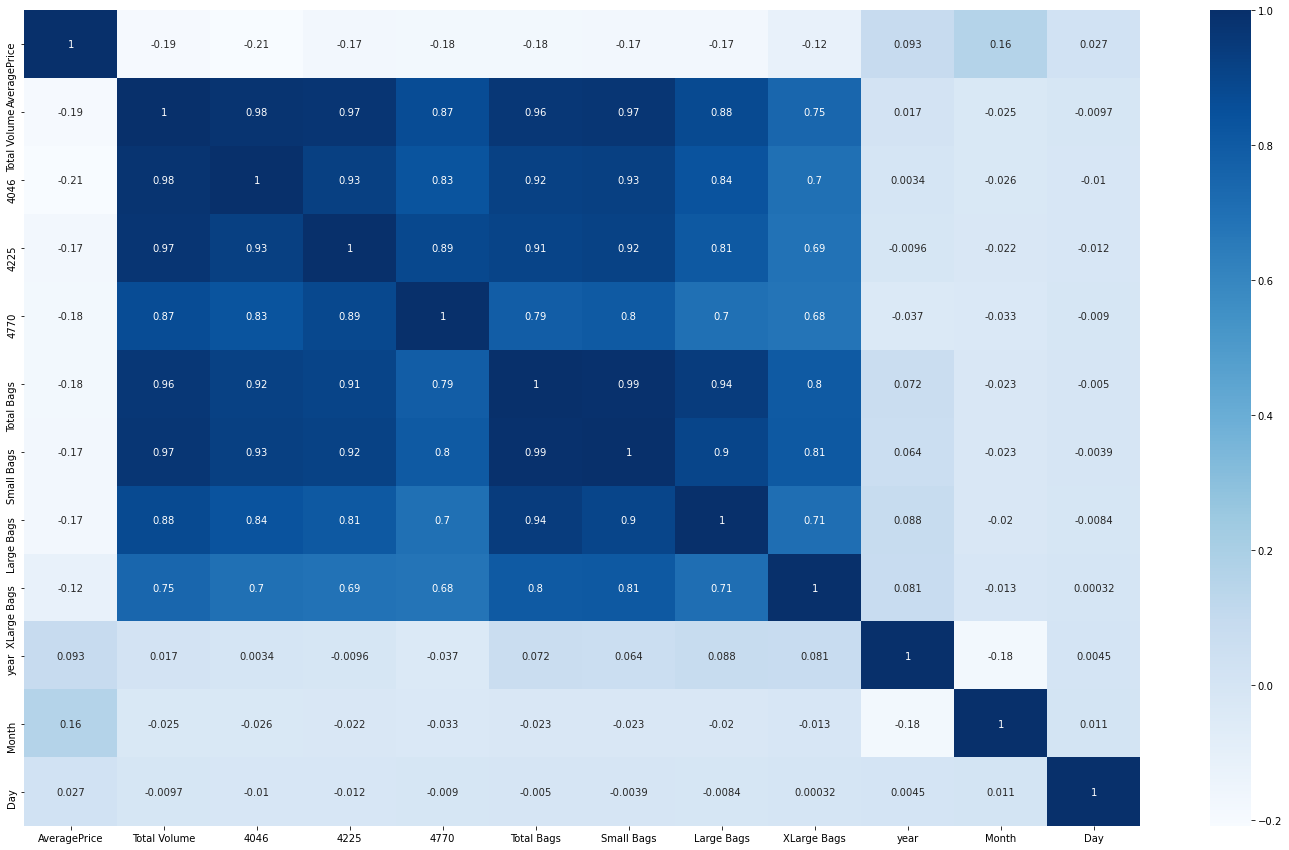

In [218]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

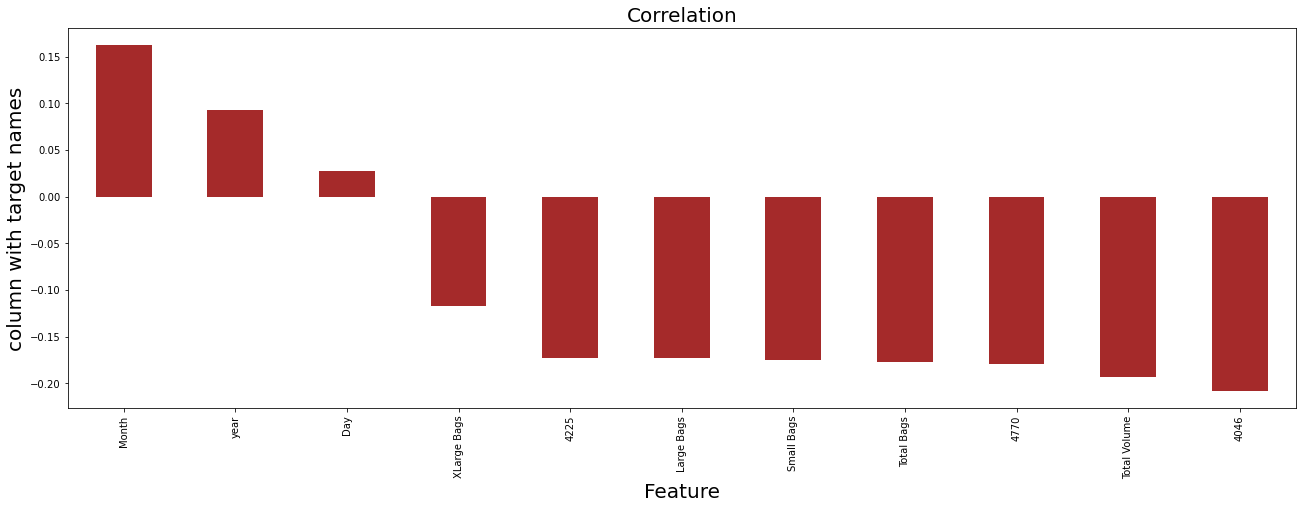

In [219]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='Brown')
plt.xlabel("Feature",fontsize=20)
plt.ylabel("column with target names",fontsize=20)
plt.title("Correlation",fontsize=20)
plt.show()


In [220]:
from pandas.plotting import scatter_matrix

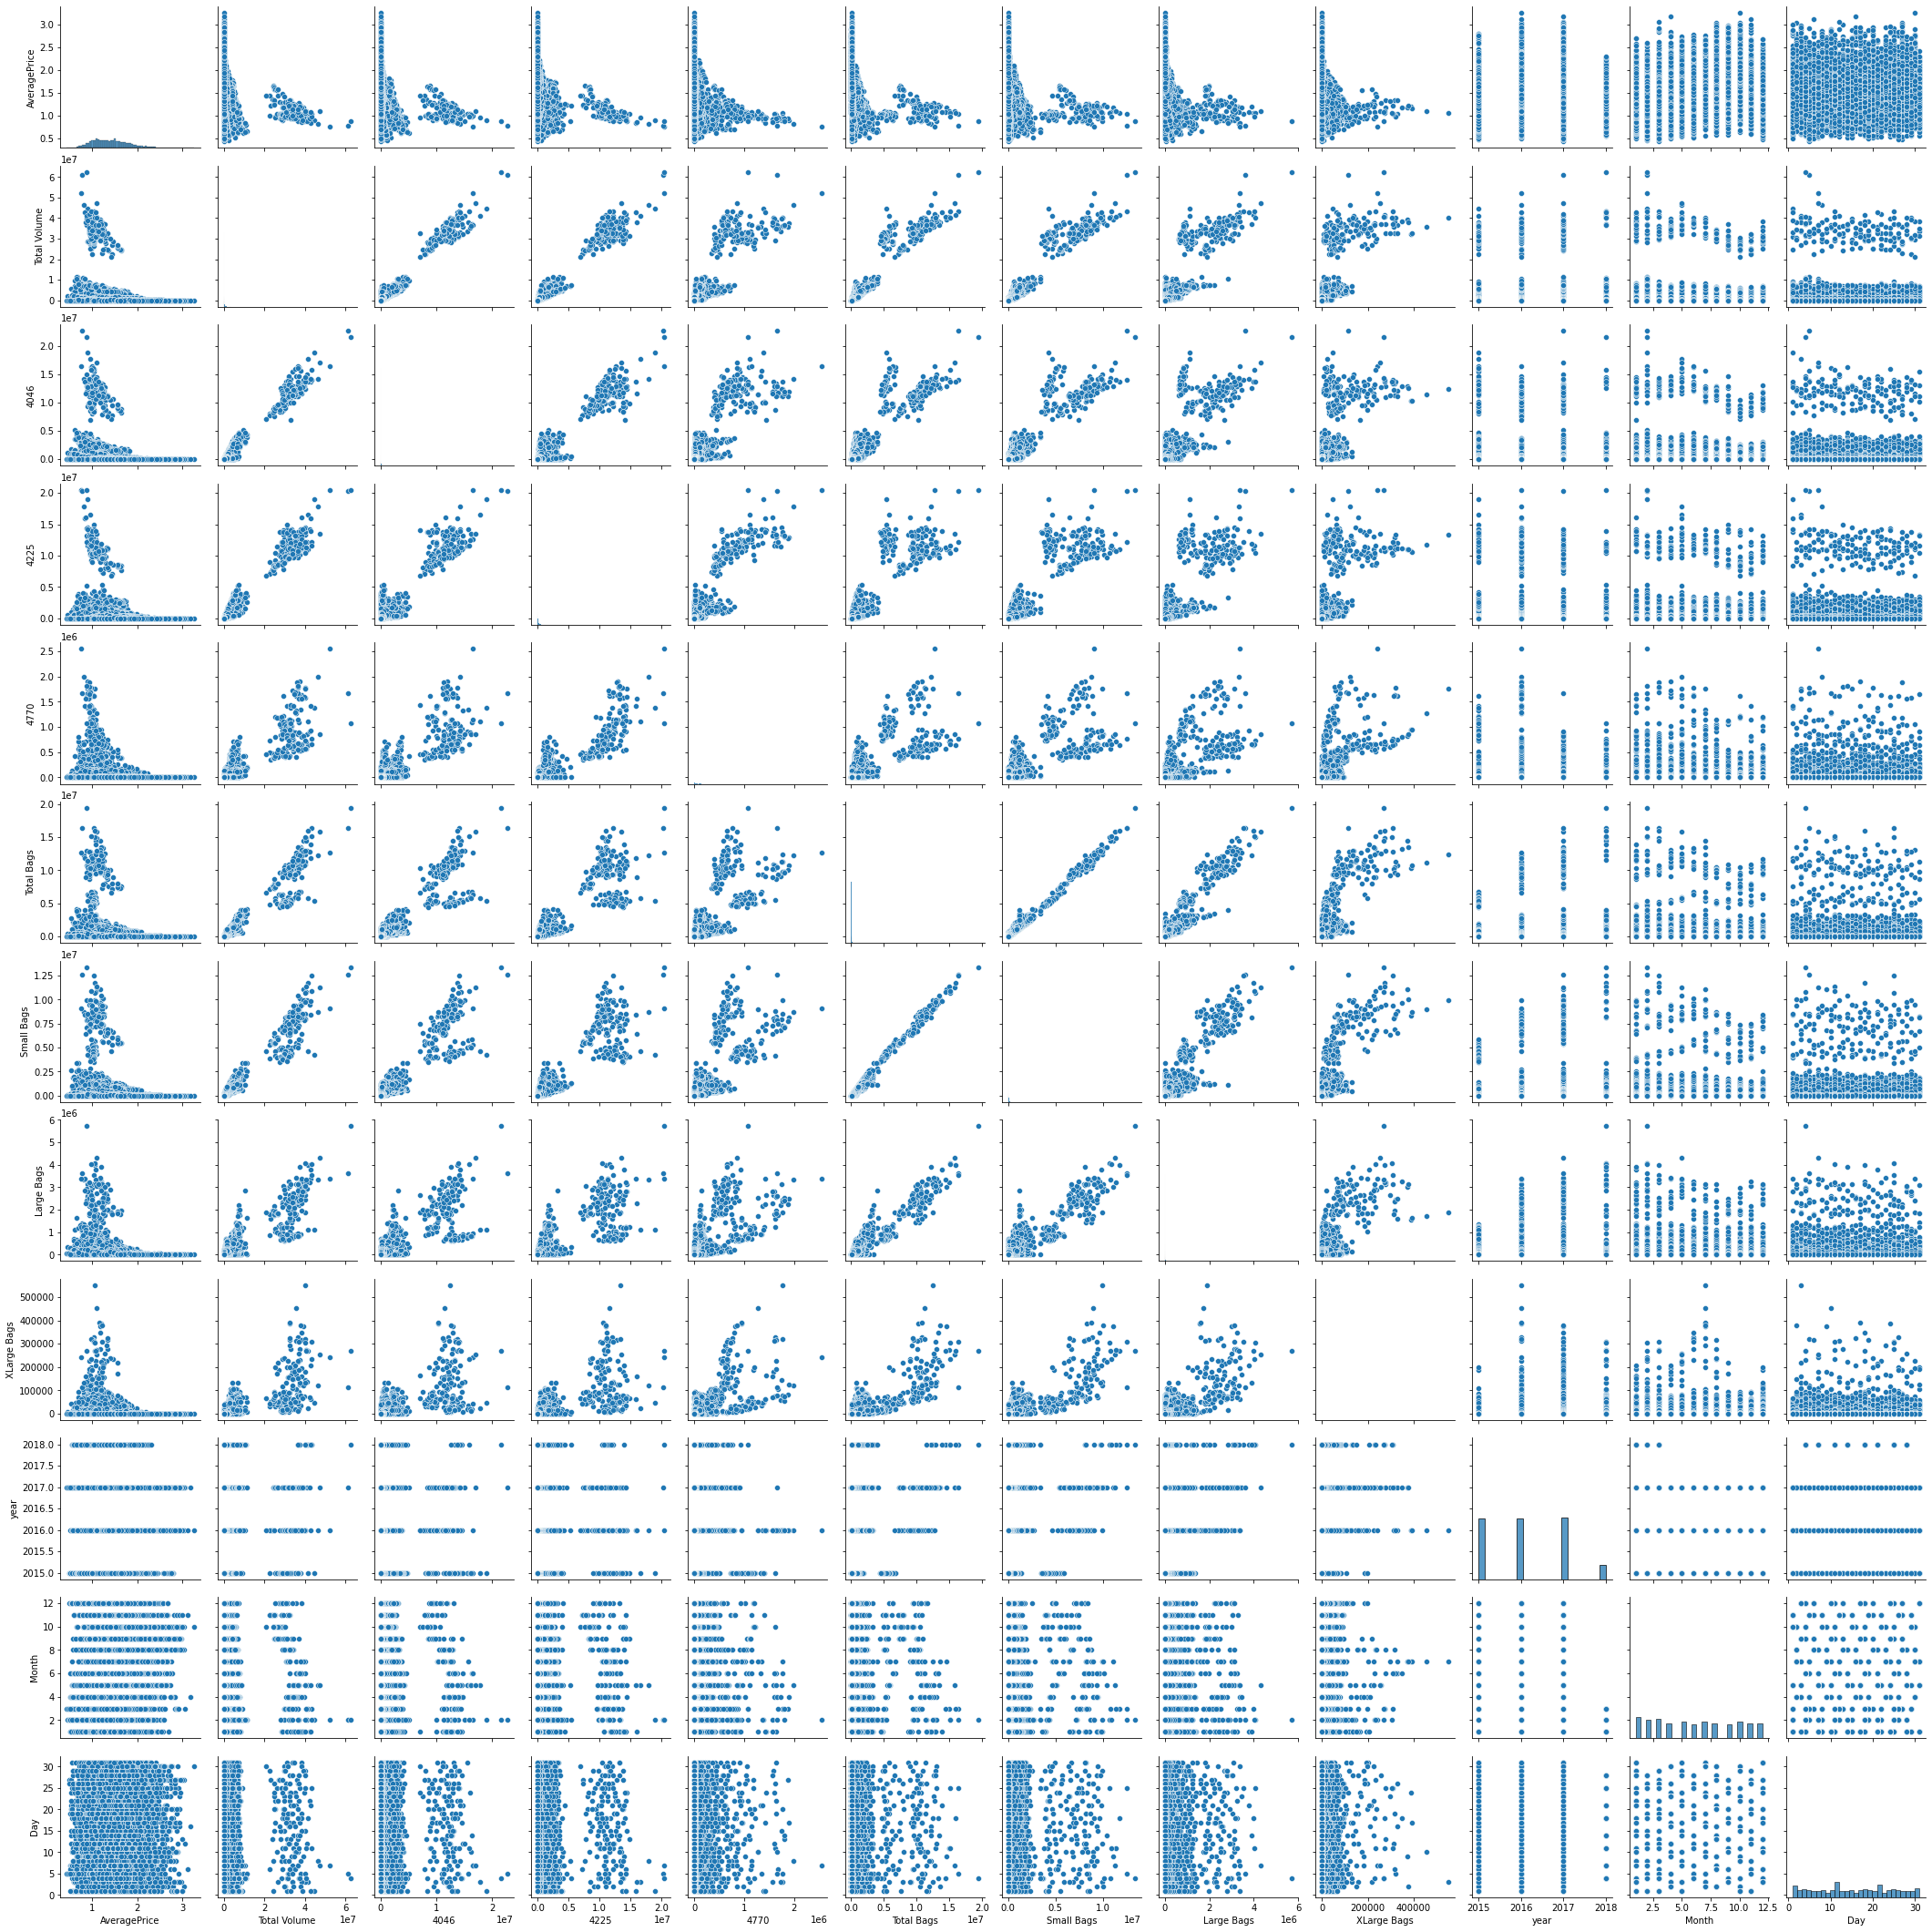

In [221]:
sns.pairplot(df)

## Skewness

In [222]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [263]:

#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=['Total Volume', '4046', '4225', '4770', 'Small Bags','Total Bags','Small Bags',
       'Large Bags', 'XLarge Bags']
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [224]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

In [225]:
df['XLarge Bags']=np.sqrt(df['XLarge Bags'])

df['XLarge Bags'].skew()

0.8655290494802615

In [226]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.865529
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

## Checking & Removing the Outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
Day             AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

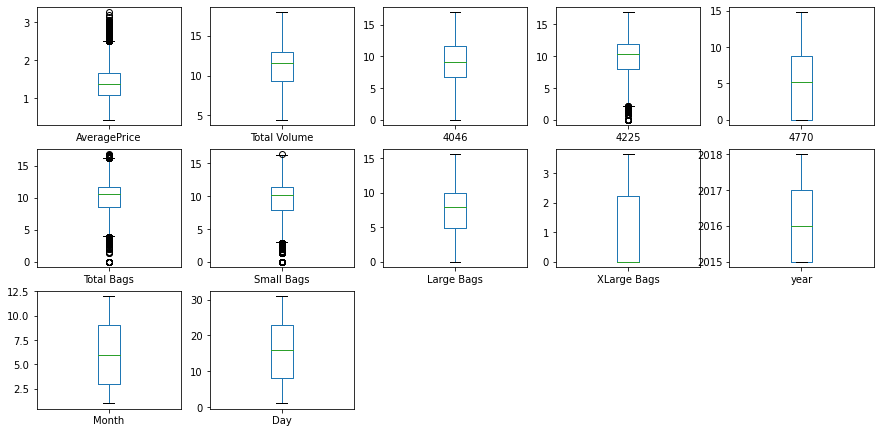

In [227]:
#Plotting the boxplot of each coumn to check the outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [228]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,2015,Albany,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,2015,Albany,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,2015,Albany,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,2015,Albany,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,organic,2018,WestTexNewMexico,1,14


## Encoding 
### Label Encoder

In [229]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [230]:
le=['type','region']
for i in le:
    df[i]=label.fit_transform(df[i])

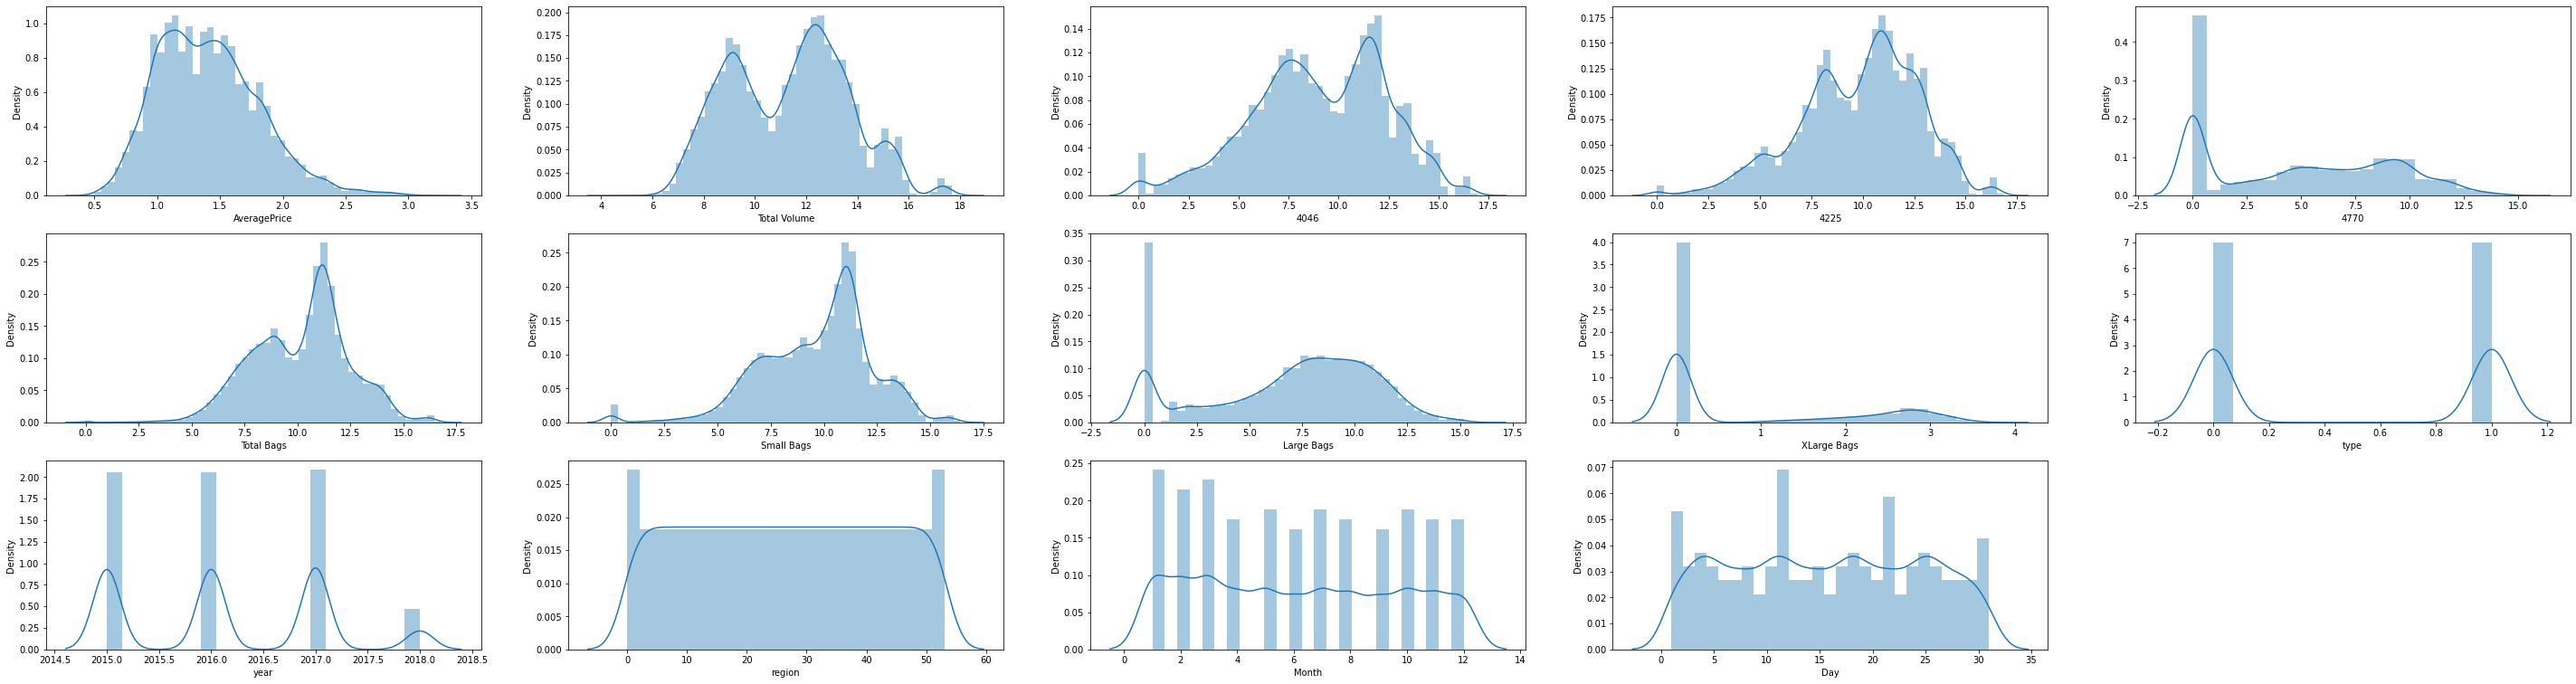

In [231]:

collist=df.columns.values
ncol=5
nrow=11
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [232]:
# Average price is normally distributed
# Except for the Average price all the other attributes are positively skewed

In [233]:
df['region'].value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
6     338
47    338
53    335
Name: region, dtype: int64

### Removing the outlier using the Zscore method.

In [234]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]

In [235]:
print(df.shape)
print(df_new.shape)
df=df_new
print("Shape after removing ouliers",df.shape)

(18249, 14)
(17840, 14)
Shape after removing ouliers (17840, 14)


In [236]:
#Check data loss
print("Percentage data loss=",((1-17840/18249)*100))

Percentage data loss= 2.241218696914904


#### Outlier have been removed.


### Spliting data

In [237]:
df_x=df.drop(['AveragePrice'],axis=1)
y=df[['AveragePrice']]

In [272]:
#Data scaling to achieve more accuracy
from sklearn.preprocessing import StandardScaler
m=x.copy
sc = StandardScaler()
X = sc.fit_transform(df_x)

x=pd.DataFrame(X,columns=df_x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,-0.133254,-0.627767,0.356989,-0.302326,-0.545945,-0.324558,-0.685609,-0.702541,-0.977166,-1.229782,-1.690887,1.648546,1.292953
1,-0.202312,-0.755763,0.285925,-0.256947,-0.505455,-0.287063,-0.674126,-0.702541,-0.977166,-1.229782,-1.690887,1.648546,0.495064
2,0.134235,-0.706881,0.605595,-0.064871,-0.575779,-0.352864,-0.659570,-0.702541,-0.977166,-1.229782,-1.690887,1.648546,-0.302825
3,-0.042578,-0.601605,0.456727,-0.204998,-0.729541,-0.498926,-0.592308,-0.702541,-0.977166,-1.229782,-1.690887,1.648546,-1.100714
4,-0.234101,-0.656450,0.279456,-0.194724,-0.701228,-0.476706,-0.490995,-0.702541,-0.977166,-1.229782,-1.690887,1.366256,1.520922


In [273]:
#checking multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m

In [274]:
vif.round(1)

,vif,features
0,53.4,<bound method NDFrame.copy of Total Vol...
1,6.4,<bound method NDFrame.copy of Total Vol...
2,9.7,<bound method NDFrame.copy of Total Vol...
3,4.3,<bound method NDFrame.copy of Total Vol...
4,32.5,<bound method NDFrame.copy of Total Vol...
5,15.3,<bound method NDFrame.copy of Total Vol...
6,3.1,<bound method NDFrame.copy of Total Vol...
7,2.1,<bound method NDFrame.copy of Total Vol...
8,3.4,<bound method NDFrame.copy of Total Vol...
9,1.4,<bound method NDFrame.copy of Total Vol...


In [275]:
x.drop('4225',axis=1,inplace=True)

In [276]:
x.drop('Total Bags',axis=1,inplace=True)

In [277]:
x.drop('Small Bags',axis=1,inplace=True)

In [278]:
#checking multicollinearity after dropping multicollinear columns
m=x.copy()
SC=StandardScaler()
X=SC.fit_transform(m)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=m.columns

In [280]:
vif.round(1)

,vif,features
0,8.7,Total Volume
1,5.0,4046
2,4.0,4770
3,1.9,Large Bags
4,2.1,XLarge Bags
5,3.4,type
6,1.2,year
7,1.1,region
8,1.0,Month
9,1.0,Day


In [281]:
#Tried Principal Component Analysis to improve R2 score. But R2 score not improved.
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pc_x=pca.fit_transform(x)

#Information retained in data after dimensionality reduction
print("Percentage info retained in data=",(sum(pca.explained_variance_ratio_)*100))

Percentage info retained in data= 99.1733195018319


In [282]:
x.shape

(17840, 10)

In [283]:
y.shape

(17840, 1)

# Model Building

In [284]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [285]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 69 is 0.5153891216783798


cross validation score 0.09846748974439316


Standard Deviation 0.2476648086003597


Training accuracy 0.48942915900518535


Test Accuracy 0.5037166541626892


MAE 0.21671151063992777


MSE 0.07443892125956161


RMSE 0.27283497074158514




69

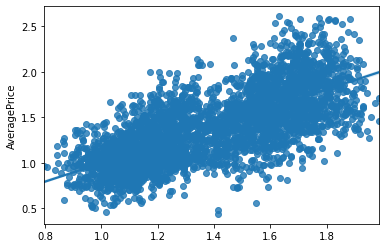

In [286]:
#LINERAR rEGRESSION
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 69 is 0.5153907942631344


cross validation score 0.09848674652596719


Standard Deviation 0.24765167457083323


Training accuracy 0.489429152263417


Test Accuracy 0.5037179048713945


MAE 0.21671027318962574


MSE 0.0744387336622795


RMSE 0.2728346269487792




69

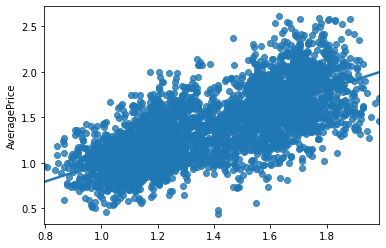

In [287]:
## Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 78 is 0.7703153074623527


cross validation score -0.23268374088937743


Standard Deviation 0.4278693175282396


Training accuracy 1.0


Test Accuracy 0.7250544136356428


MAE 0.1309248878923767


MSE 0.04123985426008968


RMSE 0.2030759814948328




78

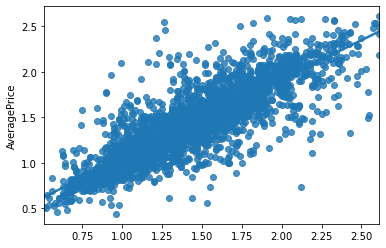

In [288]:
#### Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 69 is 0.7613841506592492


cross validation score 0.018820787318046907


Standard Deviation 0.24090956648533482


Training accuracy 0.8280772305713999


Test Accuracy 0.7526852120089413


MAE 0.1416317264573991


MSE 0.03709543385650224


RMSE 0.19260174935992208




69

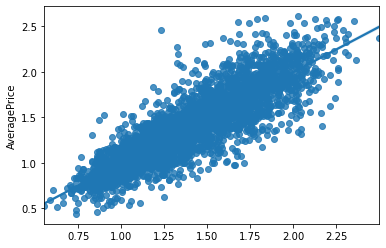

In [289]:
## KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 69 is 0.7385665341185204


cross validation score 0.00018122246133618348


Standard Deviation 0.43236483488863325


Training accuracy 0.7431653919295792


Test Accuracy 0.7283103437548051


MAE 0.14942352638500697


MSE 0.04075148823330303


RMSE 0.20186997853396388




69

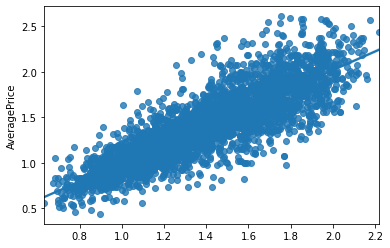

In [290]:
#SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 58 is 0.8874989643783346


cross validation score 0.20085286403406677


Standard Deviation 0.30871049738789


Training accuracy 0.9825192439956876


Test Accuracy 0.8752583514425072


MAE 0.09480249439461882


MSE 0.018710347289798205


RMSE 0.13678577151808666




58

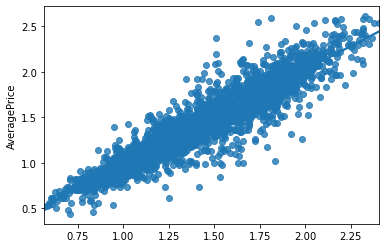

In [291]:
## random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 58 is 0.5657818715482008


cross validation score 0.06229550571101798


Standard Deviation 0.3871182537046623


Training accuracy 0.5542688786388736


Test Accuracy 0.5572948743350731


MAE 0.20625764245427694


MSE 0.06640257479318841


RMSE 0.25768697055378725




58

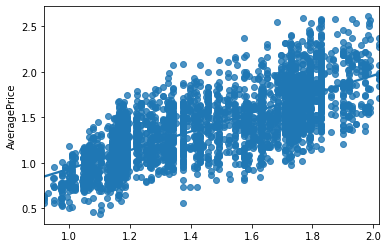

In [292]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,x,y)

max r2 score corresponding to 69 is 0.7346692705315938


cross validation score 0.3780002351822979


Standard Deviation 0.2226314905874007


Training accuracy 0.7355370734830592


Test Accuracy 0.7275018763543458


MAE 0.15190582972939057


MSE 0.04087275251039089


RMSE 0.20217010785571365




69

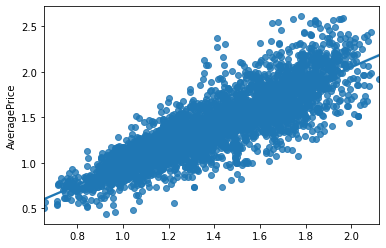

In [293]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

In [321]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=88.01645813044888,cross_value_score=86.26432092325373,and difference=1.7521372071951475


In [322]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=49.74352504422903,cross_value_score=49.00453277182465,and difference=0.7389922724043814


In [323]:
#SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")

Accuracy=49.74352504422903,cross_value_score=49.00453277182465,and difference=0.7389922724043814


# HYPER TUNING

In [324]:
#creating parameter list to pass in gridsearch CV
parameters={"criterion":["mae"],"n_estimators":[200]}

In [325]:

from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(rf,parameters,cv=5,scoring="r2")
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("final accuracy = ",r2_score(y_test,GCV_pred)*100)

final accuracy =  87.51161579082559


## Now it can be observed that above regression Model Random Forest Regressor has a highest accuracy. 

# After Hyper Tuning we can see that accuracy of the model has been increased from 78% to 87%

In [352]:
import joblib 
joblib.dump(rf,"avocado_Project.obj")

['avocado_Project.obj']